## Content

- Soft Margin SVM


- Algebric Intuition 
 
- Hinge loss 
 - geometric intuition of hinge loss
 - Algebric intuition of hinge loss

- Comparison with other loss

- SVM imbalance 

- Code implementation of Linear SVM on Spam Data

- Primal form 
- Dual form 
- Runtime of SVM

- Kernel SVM 
- Kernel trick 
- Logistic regression Vs Kernel SVM 


- RBF kernel 

- Code Implemetation for RBF-SVM on Spam Data 

## **Question: When would Linear SVM with Hard Margin fails?** 


- When Data is non-linear separable and data has some outliers

Note: hard Margin classifers rarely work in real world problems



<img src='https://drive.google.com/uc?id=1XIIrNFbjwEavFnDdrzGvraiCrE9Hh1jw'/> 


What if we had a +ve datapoint $x_1$ which is 0.5 units in between $\pi^+$ and $\pi$, what will be the value of $(w^Tx_i+b)y_i $ ?
- $(w^Tx_i+b)y_i = 1-0.5$ , since the distance from $\pi$ to $\pi^+$ is 1 , and the distance between $\pi^+$ to $x_1$ is 0.5.
- lets call this 0.5 as $ \zeta_1 $

what will be the value of $(w^Tx_i+b)y_i $ if we have a +ve datapoint $x_2$ between $\pi$ and $\pi^-$ such that it is 1.5 units away from $\pi^+$?
- $(w^Tx_i+b)y_i = 1-1.5$ , since we want $x_2$ to be beyond $\pi^+$, hence considering $\pi^+$ for finding the distance
- therefore, the distance from $\pi$ to $\pi^+$ is 1 , and the distance between $\pi^+$ to $x_2$ is 1+ 0.5

- lets call this 1.5 as $ \zeta_2 $
- Also notice how $x_2$ will be misclassifed as a negative datapoint

what will be the value of $(w^Tx_i+b)y_i $ if we have a +ve datapoint $x_3$ beyond $\pi^-$ at a distance of 2.5 from $\pi^+$?

- $(w^Tx_i+b)y_i = 1-2.5$
- Calling this 2.5 as $ \zeta_3 $





<img src='https://drive.google.com/uc?id=1gZj9ZemwWxWa6A8QEsblTrOszW9rEaIg'/> 


Now in a hard-Margin Classifier,
if we have a +ve datapoint which is beyond the $\pi^+$, then what will the $\zeta$ be ?
- 0 , this means $\zeta_i = 0$ for correctly placed data points

hence we can say if $\zeta$ is > 0, the datapoint is incorrectly placed

Now if $0<\zeta<1$, as seen in $x_1$ will the hyperplane $\pi$ misclassify ?
- No , since the point lies above the $\pi$, $x_1$ will still be classified correctly

Now will datapoints $x_2$ and $x_3$ be classified correctly by $\pi$ ?
- No, thus showing if $zeta>1$ the model will incorrectly classify the datapoint


<img src='https://drive.google.com/uc?id=1ZDVI2XzRPjBlB9PG6bbE9q1RkV9kKpii'/> </td>

# **Soft Margin SVM**

Question: What if data is not perfectly linearly seperable ? it's not non-linear but can not be seperated perfectly

Imagine some data like this, where some data points are on the wrong side

Note: such data is also referred as **almost linear seperable**

#### How to account for these data point ?

This case is often referred as Soft-margin SVM 

#### Why Soft-margin ?
- because margin is not perfect
- there are some points with $ \zeta_i > 0 $

If we recall optimization problem
- $ max \ \frac{2}{||w||} $ with some $ \zeta_i's $

Can we think of another way to write this ?

- $ min \ \frac{||w||}{2} $ with some $ \zeta_i's $

Aren't both equation mean same thing ?

We will use this minimization optimization to compare SVM with different other models



<img src='https://drive.google.com/uc?id=1oGFEoy2iJzt1eZpXBUNkOOwCsYjtLvES'/>

#### Question: If we recall, what will be the value of $ y_i(w^Tx_i + b) $ if a data point is perfectly classified and perfectly placed. ?

- if we recall,  $ y_i(w^Tx_i + b) >= 1 $ 

####  Question:  What will be the value of $ y_i(w^Tx_i + b) $ if a data point is not perfectly placed or classified where $ \zeta_i > 0 $?
-  $ y_i(w^Tx_i + b) >= 1 -  \zeta_i $  

#### what do you think our goal is here ?

- We want to maximize margin 
- along with that we want each data point to be appropriately place

so what we can add in our optimization problem to satisfy our goal ?

- As we want to minimize data points having $ \zeta_i > 0$,

- so we should minimize $ \zeta_i's $, as it is like an error 


Now with the introduction of $ \zeta $,  the final function will change to <br>

- $ min_{w,b} \ \frac{||w||}{2} + \frac{C}{N} \sum_{i=1}^N \zeta_i$

- such that $(w^Tx_i+b)y_i >= 1 - \zeta_i$ for all i : 1-> n
-  $ \zeta_i >= 0 $.

if we recall the regularization, we have a hyperparameter $ \lambda$ , similarly we have a hyperparameter C and we want to minimize the $\zeta_i$ for all n samples

#### What's the use of C here ?
- C controls whether to focus on maximizing margin or,
- minimizig the errors $ \zeta_i's $

To summarize, we want to find (w,b) which maximize the margin, along with aim to minimze  $ \zeta_i \$  errors because of points not lying on their appropriated places.

Note: This is also called as **SVM with soft margin** which we use when we almost linearly seperable data

<img src='https://drive.google.com/uc?id=1VzX7daT4w5JUViQiJS2V7H6X5Y00p20c'/>

## **Question: Does this equation $(w^Tx_i+b)y_i >= 1 - \zeta_i$ holds true for negative points as well ?**

Yes, to understand say we have three hyperplanes
- $ \pi = w^tx+b = 0 $
- $ \pi^+ = w^tx+b = 1 $
- $ \pi^- = w^tx+b = -1 $

Now imagine some negative data points

Say  $ \ x_1 $ is negative labelled point and 0.5 distance in between $ \pi \ and \ \pi^- $

#### What will be the value of $ y_i(w^tx_i+b) $ for it ?

  - $\ y_i(w^Tx_i+b)$ = 0.5 = 1 - 0.5, 
  
here 

 - $ \ y_i $ is -ve and $(w^Tx_i+b)$ also -ve 
 
 - so product will be postive.

#### What will be the value of $ y_i(w^tx_i+b) $ for $ x_2 $ which is at 2.5 unit distance from $ \pi^- $ in opposite space ?

  - $\ y_i(w^Tx_i+b)$ will be -1.5 = 1 - 2.5   where 2.5 is $ \zeta_i $
  
here again
-  $ \ y_i $ is -ve but $(w^Tx_i+b)$ is +ve 
- so product -ve


#### Question : why take $ y_i $ as +1 and -1 and not +1 and 0 ?
- We could have considered y_i as 0 and 1 but the maths behind these Soft-margin and Hard-Margin will become too overwelming 
- Hence we used +1 and -1 instead


<img src='https://drive.google.com/uc?id=1BpQLbfnLK-MHtEVkGkh1H_o5g8V7r63f'/> 



---
---
---



# **Algebric Intuition**


Recall we use Optimization to minimize the loss or error of the model

Example1: In Logistic Regression, the optimization use to minimize   

- Logloss

- And have a Regularization parameter (λ)  which controls the Regularization 


Example2: In Linear Regression, the optimization use to minimize   

- Squared loss 

- And also have a Regularization parameter (λ)  which controls the Regularization as discussed in Logistic Regression 

<br>

### **Now for Soft-Margin Linear SVM, what will be the error ?**
 We see Soft-Margin SVMs are defined as:
  - min<sub>(w,b)</sub> $\frac{||w||}{2}$ + $C\frac{1}{N}$$\sum_{i=1}^N \zeta_i$

  - Such that $ y_i(w^tx_i + b ) \geq 1 - \zeta_i and\  \zeta_i \geq 0 $ for all n datapoints

<br>

if we look closely, the term $\frac{1}{N}$$\sum_{i=1}^N \zeta_i$ 
- is nothing but the error which we try to minimize
- Since $ζ_i$ will be non zero, for data points which are 
 - either inside the margin 
 - or are misclassified

**Note:** we call $\frac{1}{N}$$\sum_{i=1}^N \zeta_i$ as **Hinge Loss** 

<br>

if we now look at the term $\frac{||w||}{2}$, it is quiet similar to L2-Regularization 
- Though $\frac{||w||}{2}$ is used in order to have maximum Margin (Gemotrically),
- Algebraically, $\frac{||w||}{2}$ is just $\frac{1}{2}$ of L2-Regularization

<br>

Recall how C was a hyperparameter that was used to have tradeoff between 
 - maximizing the margin  
 - minimizing the error ($ζ_i$)

Hence we can say C becomes Analogous to our Regularization Hyperparameter (λ)


Therefore we can interpret our Soft-Margin SVM as   
 - $C$ HingeLoss $+\frac{1}{2}$ L2Reg 

**Note:** $\frac{1}{2}$ L2Reg can also be called as Margin Regularization 

<br>

#### **Question:** What will happen if C is a large value  ? 

Suppose we take C as $10^{10}$

Then the $\frac{||w||}{2}$ 
- would be a very small value 
- as compared to the HingeLoss

Hence more importance will be given to the HingeLoss 

this means that
- model will try to keep the HingeLoss as small as possible 
- which will cause the model to have minimum loss even for outliers  

Hence the **model will overfit** 


 <img src='https://drive.google.com/uc?id=15g-jYm6tuM7Bq9c6BPjhR8Dhdi19zlxu'/>

Now suppose we take C = 0 

### **What will happen with such a small value of C ?**

This will make the model to have maximizied Margin 

<br>

### What do we mean by maximizied Margin ?

Imagine we have bunch of positive and negative data points

Now since, we want to have Margin as large as possible, 

- we will make the hyperplanes $Π^+$ and $Π^-$ as far away as possible

- Even though we have errors ($ζ_i$) 

This means the performance of the model on the training dataset will reduce, 
- causing **the model to Underfit** 

<img src='https://drive.google.com/uc?id=1qGn6RnzM9FNjzF842t8otRBmxV6GmYrn'/>

## **Question: How are we classifying a datapoint when Margin is so large ?**

Recall we define, our hyperplane as $w^Tx+b = 0$

Now for after optimization, we got 
- w* and b* as the optimized values

if we have a query point $x_q$, 
- then we just use the hyperplane $Π$, to find
 - ${w^*}^T x_q + b^* $

And classify $x_q$ as:
- +ve datapoint if ${w^*}^T x_q + b^* >0$, 
- else we say $x_q$ is a -ve datapoint

<br>

**Note:** As seen Hard-Margin SVM model works when: 
- we have a perfectly Linear separable data
- Which means there is no error 

- hence model only focuses on maximizing the margin


but since data is not completely linearly seperable:
- we counter the misclassifed and inside the margin datapoints using the error ($ζ_i$) 
<br>


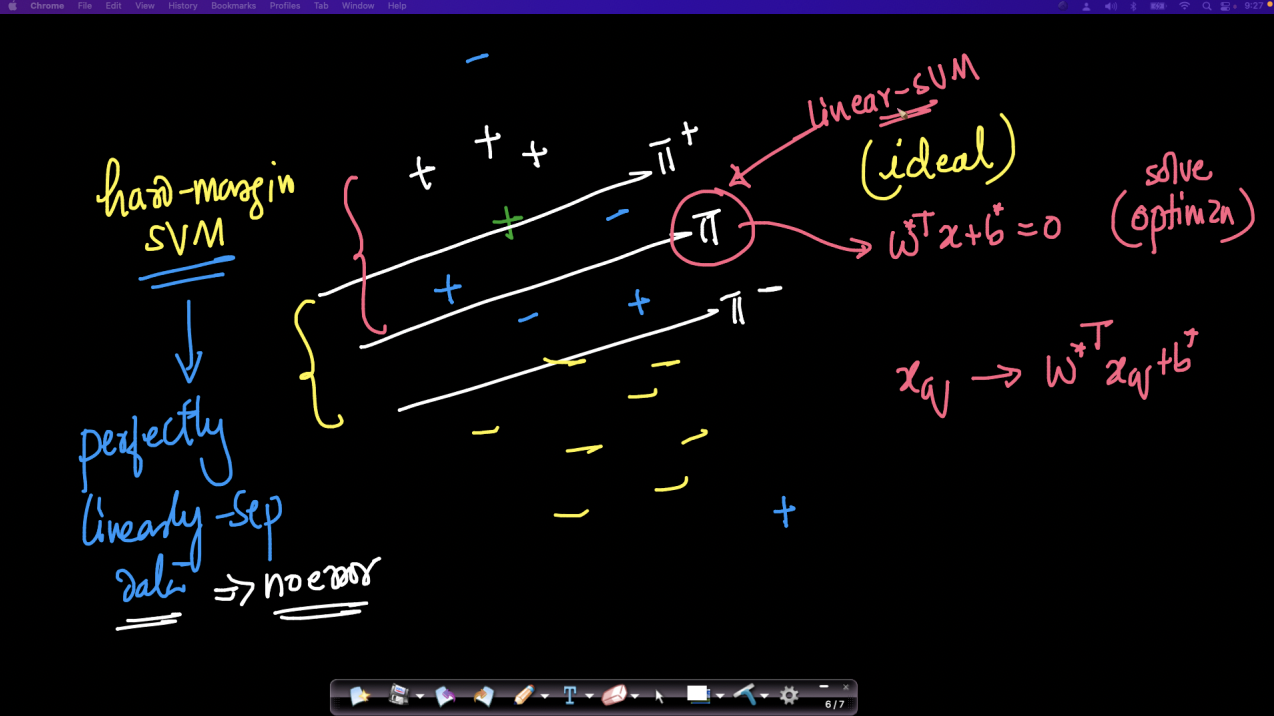

## **Question: Now since we use hyperplane $Π$, then why do we need $\pi^+$ and $\pi^-$ ?**

As discussed, there can be infinte number of hyperplanes that can classify the data 

But, in order to decide the best hyperplane $Π$ 

- which generalizes the data

- we use the Maximizing Margin approach

Hence we find $\pi^+$ and $\pi^-$

**Note:** SVMs are margin maximizing models

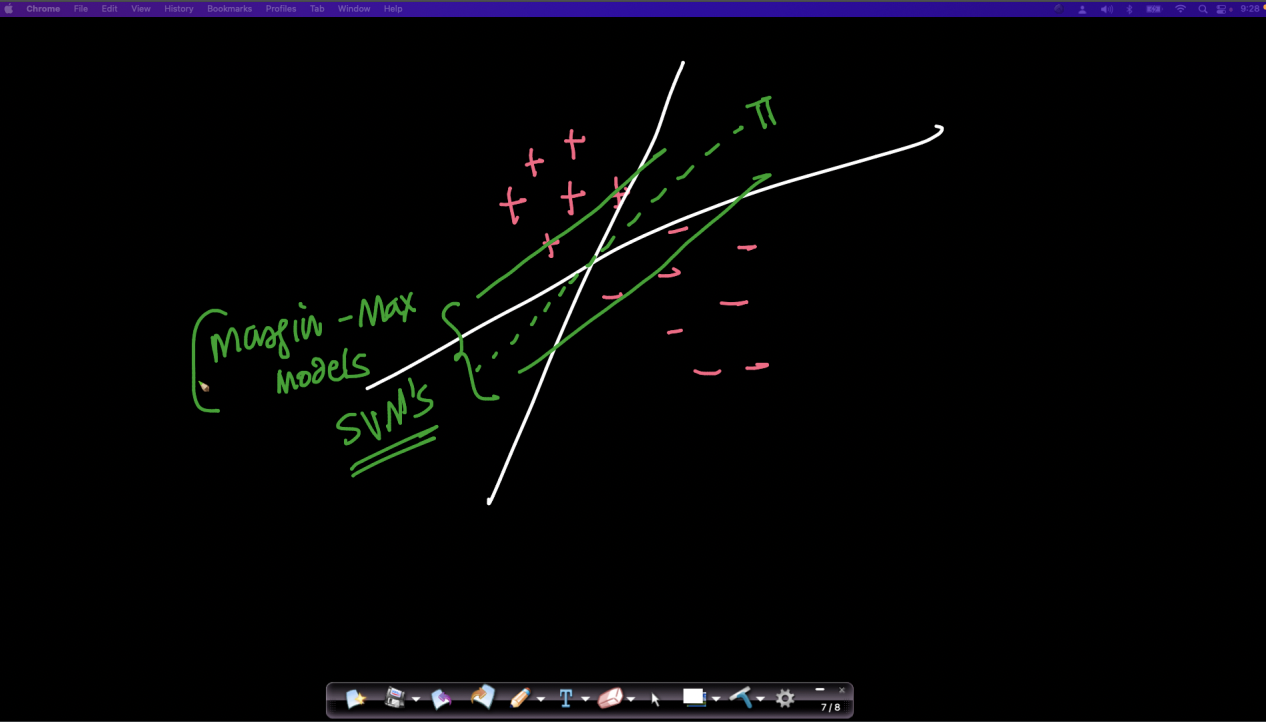

**Observe** 

we do not check the constraints $y_i(w^Tx_i+b)\geq 1$ when minimizing the loss function

<br>

## **Question:  How can we incoporate these constraints in optimization ?** 


Recall we used **Lagrange multipliers** in PCA. 

- And how it can be used in any 
constraint optimization problem 

Thus making the constraints part of the loss function 

<br>

**Note:** After adding constraints into the loss function, 
- we can use Optimization algorithm like Gradient Descent to find the global minima



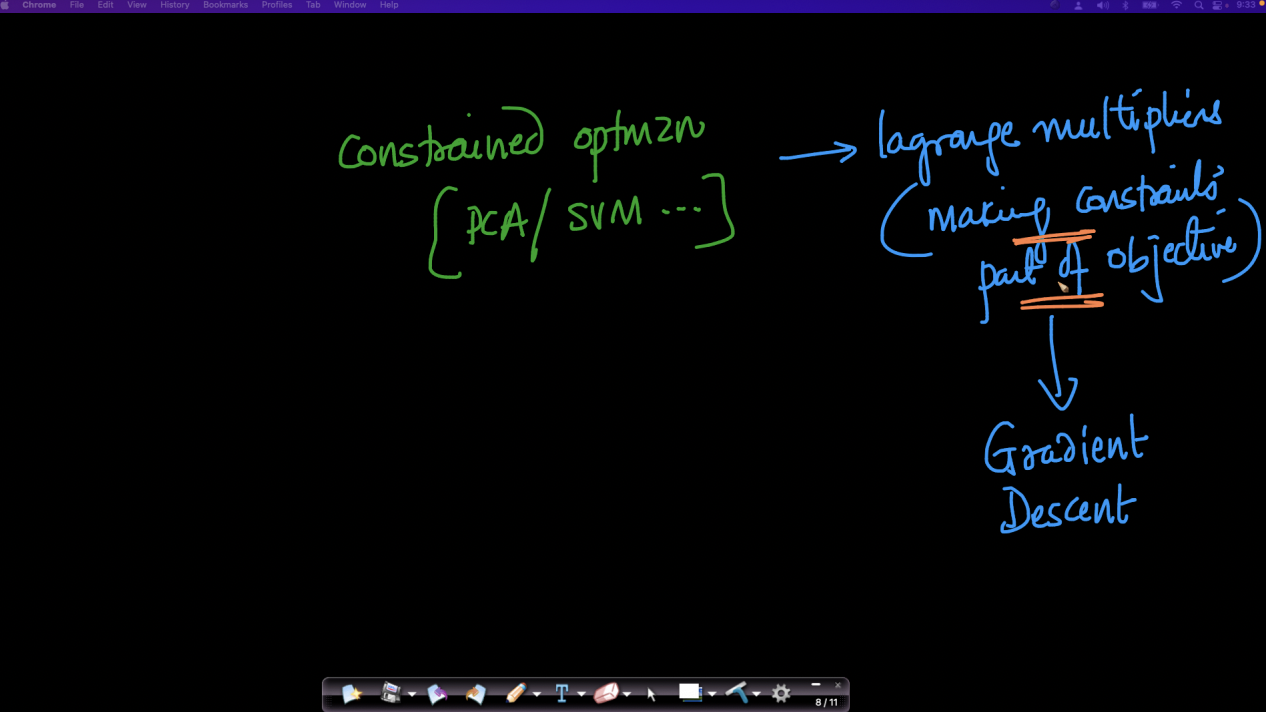

#### **Question:** How will the loss function look after adding constraints ?

Recall that, SVMs have n constraints, 
- this means for each constraint,we will have a Lagrange Multiplier (λ)

 - Thus causing us to have n Lagrange Multiplier {$λ_1$,$λ_2$,$λ_3$....,$λ_n$} 
<br>

Therefore the final loss function $L(w,b)$ becomes:
 - ${Min}_{w,b} \frac{||w||}{2} + C \frac{1}{n} ∑_{i=1}^{n} ζ_i + λ_1 {(Constraint \ 1)}... + λ_n {(Constraint \ n)}  $ 

<br>

**Note:** We find the global minima using Gradient-Descent, 
- though we have another specialized Optimization Algorithm
 -(SMO) which we will learn later


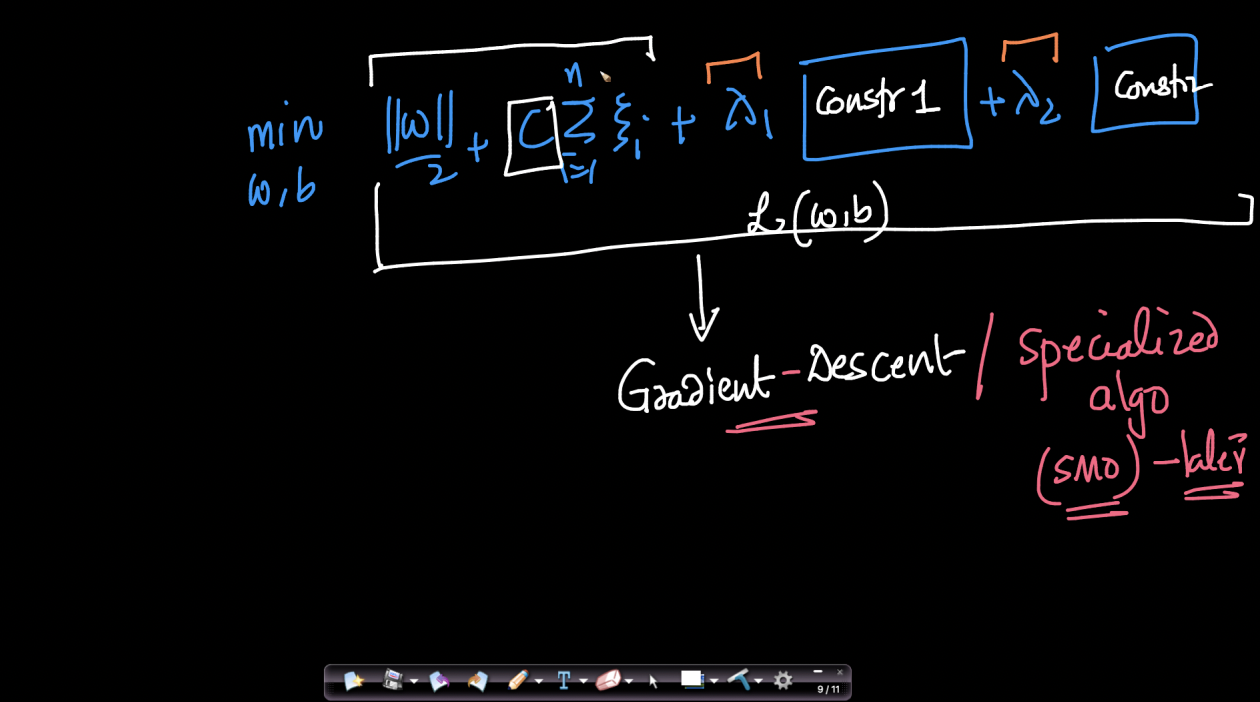

#### **Question:** Does adding constraint to the loss function will make it not convex ?

The loss function for SVM is a convex function because of the term 
- $\frac{||w||}{2} + C \frac{1}{n} ∑_{i=1}^{n} ζ_i$

The constraints do not play any role to define the convexity of the loss function

<br>

**Note:** Deep Learning algorithms can have non convex loss function
- and they still be able to provide SOTA results

Though we have hacks and algorithms to 
- counter these non-convex loss function


<img width=80% src='https://drive.google.com/uc?id=1uAy6dVGwBi6J_BaDGWQUjoq6J58ExNJL'/>

# **Geometric intuition of Hinge Loss**

#### How will the plot of hinge loss look like?

lets say 

- we define $f(x_i)$ as the best hyperplane $\pi: w^Tx+b$

- And assume our x-axis to be:
 - $z_i = y_if(x_i)$ 

<br>

#### Now if we plot Hingeloss for a +ve datapoint that lies on or beyond $\pi^+$, what will the $\zeta_i$ be ?

Ans: Zero , since the datapoint is correctly positioned 

<br>

#### what will be the value of $z_i$ for such a datapoint ?

Since $f(x_i)$ is defined as our best hyperplane $Π$ 
- and the distance between $Π$ and $Π^+$ is 1

Therefore the value of $f(x_i)$ will be > 1 
- Since the distance between the hyperplane $\pi$ and the datapoint (beyond $\pi^+$) will be >1

- Thus making $z_i > 1 $, since $f(x_i)>1$ cause $y_i = 1$ for a +ve datapoint

hence we can say, for +ve datapoint which lie on or beyond the $\pi^+$ ($z_i\geq 1$)
- will have hinge loss as 0


<br>
 
#### Similarly, for a -ve datapoint that lies beyond $\pi^-$, What will be $z_i$ ?

Since for a -ve datapoint, we have 
- $y_i = -1$

and the distance between the hyperplane $\pi$ and the datapoint (beyond $\pi^-$) will be >1 but weight vector is in oppsite direction so

- $f(x_i)<-1$

Therefore making $z_i = y_if(x_i)$ greater than 1

Hence for all the -ve datapoints which lie on or beyond the $\pi^-$ ($z_i\geq 1$)
- will also have hinge loss as 0

<br>


#### What about datapoint between $\pi^+$ and $\pi$?

Recall if we have a +ve datapoint which was 0.5 distance from $\pi^+$,

- The $f(x_i)$ becomes 0.5 since the datapoint is 0.5 distance from $Π$
- Thus making $z_i = (1) (0.5) = 0.5 $

#### What can we say about the error $ζ_i$ ?
 Ans: $\zeta_i$ becomes 0.5

<br>

#### What about a +ve datapoint on $\pi$?

Since our +ve datapoint lies on $\pi$,

- We can say $f(x_i) = w^Tx+b = 0$

- Thus making $z_i = (1) (0) = 0 $

#### What can we say about the error $ζ_i$ ?

Since our +ve datapoint is on $\pi$ ($w^Tx+b = 0$ )

- Thus we can say, the datapoint is at a distance of 1 from $\pi^+$,

 - which makes we can say $w^Tx+b = 0 = 1-1$

Therefore our $\zeta_i$ becomes 1

<br>

**Observe**
- when $z_i = 0.5$, hinge loss = 0.5
- and when $z_i = 1$, hinge loss = 1
  
Hence we can say, our hinge loss increases as the +ve datapoints are misclassified or $z_i$ decreases



- therefore we see a linear relation between $z_i$ and $ζ_i$

hence making a hinge like shape 

**Note:** Since we saw how there is a hinge-like shape in the plot, 
- we call the loss function as HingeLoss

<img width=80% src='https://drive.google.com/uc?id=1UY1HSMNJhwn4fgJTXK2F2Qy0KblzHS1Z'/><br>


# **Algebric intuition of HingeLoss**

if we recall from the soft margin SVM
- the constraint was $ y_i(w^Tx_i+b) >= 1-ζ_i$

And if we look closely,
- $y_i(w^Tx_i+b)$ is nothing but $z_i$

so we can write:
- $ z_i >= 1-ζ_i$ 

<br>

#### What are we minimizing in $ z_i >= 1-ζ_i$ ?

Ans: $ \zeta_i$

Hence the minimum value of $ z_i >= 1-ζ_i$ will be:

- $ z_i = 1-ζ_i $

placing  $ζ_i$ to RHS

- $ ζ_i = 1-z_i $





<img  src='https://drive.google.com/uc?id=1fvaq6xftQ347uXaq1oyEmQXGSxNpOfAN'/>

Recall how $ζ_i$ is zero for datapoints 
- which are correctly place on or beyond the hyperplanes of $\pi^+$ and $\pi^-$


Hence making,  $ \zeta_i $ to have values as  0 or $ 1 - z_i $ 

- therfore we can define $ζ_i$ as:
 > $ \zeta_i =  max ( 0 , 1 - z_i) $ 

<br>


#### Why take maximum of 0 and $1-z_i$ ?

if we consider a +ve datapoint, which is on or beyond $\pi^+$,

<br>

#### What will be the value of $ 1 - z_i $ ?

Since, $ z_i = (w^Tx_i+b)y_i $ will be > 1 as $(w^Tx_i+b)>1$

- $ ζ_i = 1 - z_i $ will be negative

<br>

But recall for such datapoints $ζ_i$ is zero,

- so to handle that case we took max of  0 and $1-z_i$


**Note:** 

$ \zeta_i =  max ( 0 , 1 - z_i) $ looks exactly like the curve we plotted between hingeLoss and $z_i$

<img  src='https://drive.google.com/uc?id=1AwJAQsYohyId06gifFOBriOy8pAE1_FF'/>

# **Comparison with other Losses** 

If we recall, for logistic Regression,

- we had some features ($x_i$) 
- corresponding to which we had our class labels as y = {0,1} 
- With the prediction of model ($y_î$) be sigmoid of $(w^Tx_i+b)$


Hence our logLoss function become:

>$ ∑_{i=1}^{n} y_i log(\hat y_i) + (1-y_i) log(1-\hat y_i) $



<br>

#### Now if we have class labels as $y_i$ = {+1, -1}, what will be loss function for logistic Regression ? 

The derivation for logLoss for $y_i$ = {+1, -1} is beyond the scope of this lecture, 

- the loss function for logisitic Regression model becomes:  
  - Loss : $ \sum_{i=1}^{n} log( 1 + e^{-y_i (w^Tx_i + b)} )$ ,

 
Now if we recall, for our SVM model, 
- $∑_{i=1}^{n}\zeta_i$ is our loss function



   




<img width=80% src='https://drive.google.com/uc?id=1jp1Qr-UyxsC06Nlmb2PHyJSmXW6LGI3k'>


Before we Compare the Logloss of Logistic Regression with HingeLoss when $y_i$ = {1,-1}, there is another loss:
- **0-1 loss** , which simply says that 
 -  the loss is 0 when the model classifies the datapoint correctly ($y_î = y_i$)  
 - the loss is 1 when the model misclassifies the datapoint ($y_î \neq y_i$)

<br>

#### Now if we have a datapoint which has $z_i=y_i(w^Tx_i+b)>0$, was the SVM model able to classify such a  datapoint correctly ?

Ans: Yes, we have seen this in the case of a +ve datapoint which was
- 0.5 distance in between the hyperplane $Π$ and $Π^+$ 

- Though there is a slight Hingeloss ($ζ_i$) involved for that datapoint but it was classified correctly by the SVM hyperplane $Π$


<br>


Hence we can say,
- 0-1 loss will be 0 when $ z_i > 0$ 
- and 0-1 loss will be 1 when $ z_i < 0$ 

**Note:** 0-1 loss does not care much of how much distance the datapoint is from the hyperplane $Π$, 
- it just cares for the datapoint to be classifed correctly or not 
- Hence not used much 

<br>


Recall how the LogLoss changed when $y_i$ = {1,-1}
- $ \sum log( 1 + e^{( -y_i (w^Tx_i + b))} )$ 

**Notice** in the exponential term of LogLoss $y_i(w^Tx_i+b)$ is just what the $z_i$ is 

<br>

Hence we can say,
- LogLoss = $ \sum log( 1 + e^{(-z_i))} )$ 

Now if we plot LogLoss and $z_i$, we can see
- the Logloss is quite Linear and is similar to Hinge loss 

- But is a bit curved when $z_i$ is between 0 and 1

<br>


#### How is  hingeLoss different from LogLoss ?

Both the losses have similar values in most cases except: 

- For datapoints which are inside the margin ,
 - As Logloss takes a curvature in that region 
 - while Hingeloss has a hinge like shape



<img width=90% src='https://drive.google.com/uc?id=1O9vH9k8kyHsOmvFYENd3cIWevdn-w5fs'/><br>

**Recall** that Linear SVM has the loss function defined as:
- min $C$(Hingeloss) $+ \frac{1}{2}$ (L2Reg/ Margin Maximize)

And we define loss of  our Logistic Regression as 

- min logLoss $+ λ$(L2Reg)

<br>

#### Now in the Real World problems, how different the performance of  Linear SVM and Logistic Regression model will be ?

Ans: the Performance of both the models will be identical, since we just saw:
- how HingeLoss and LogLoss are quite similar for most of the datapoints

- And how the Regularization hyperparameters C and $λ$ are similar in making the model to overfit and Underfit.





## Question: if Logistic Regression and Linear Soft Margin SVMs are so similar, why use SVM in the first place ?

Ans: There is another variation of SVMs: **Kernel-SVM**, 
- which makes SVMs a unique Machine Learning model.





<img width=90% src='https://drive.google.com/uc?id=1BvfVu46jeGJiWGYgIag-sN_BDQs7Bu-A'/><br>



# SVM Imbalance

#### Question: Are SVM affected by class imbalance ?

If we look at optimization problem, 
- hinge loss $(ζ_i)$ only depends on support vectors.

Hence SVM will only be affected 
 - if there is imbalance in the number of support vectors from each class

<br>

#### **Question:** Should we use SVM as the baseline model if we have imbalanced data, before investing time in fine tuning other machine learning models?

Ans: Not necessarily, because balance in number of support vectors from each classes can not be guranteed


<br>

**Note:** To handle imbalance in dataset, 
- either use class weights 
- or rebalance you data

 <img src='https://drive.google.com/uc?id=1QDhr7WkWX7-gjT6SWFaWomhSvdW6vkeU'/> 


### Code implementation of SVM on Spam Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline



loading data

In [ ]:
!gdown 1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo

df = pd.read_csv('Spam_processed.csv', encoding='latin-1')
df.dropna(inplace = True)

Downloading...
From: https://drive.google.com/uc?id=1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo
To: /content/Spam_processed.csv
100% 767k/767k [00:00<00:00, 137MB/s]


In [ ]:
df

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u å750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


Train -test split with CountVectorization and Standard Scaling

In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

#Count Vectorizer
f = feature_extraction.text.CountVectorizer()
X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

# Standard Scaler
scaler = StandardScaler(with_mean=False) # Problems with dense matrix
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test.todense())
print([np.shape(X_train), np.shape(X_test)])
print(type(X_train))

[(4173,), (1392,)]
[(4173, 7749), (1392, 7749)]
<class 'scipy.sparse.csr.csr_matrix'>


Linear SVM Models

- Let's train Linear SVM on the given data, 


In [ ]:
# SVC

from sklearn.model_selection import GridSearchCV

params = {
        'C': [1e-4,  0.001, 0.01, 0.1, 1,10] # which hyper-param value of C do you think will work well?
        }
svc = SVC(class_weight={ 0:0.1, 1:0.5 }, kernel='linear')
clf = GridSearchCV(svc, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=SVC(class_weight={0: 0.1, 1: 0.5}, kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'C': 0.0001} Mean_score: 0.6650023104205453 Rank: 6
Parameters:{'C': 0.001} Mean_score: 0.7902608766639624 Rank: 1
Parameters:{'C': 0.01} Mean_score: 0.7787168436175059 Rank: 2
Parameters:{'C': 0.1} Mean_score: 0.7718451274973015 Rank: 3
Parameters:{'C': 1} Mean_score: 0.7718451274973015 Rank: 3
Parameters:{'C': 10} Mean_score: 0.7718451274973015 Rank: 3


As you can see, we get the best performance when $C=0.001$, with F1- score of 0.79, 

Now implementing this SVM on test Data

In [ ]:

svc = SVC(C=0.001,class_weight={ 0:0.1, 1:0.5 }, kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.f1_score(y_test,y_pred))


0.8835820895522388


Linear SVM performing much well on the Spam Data with F1 Score 88% when using class weights

# **Primal form of SVM**


If we Recall, the Optimization for SVM is trying to optimize:

- min $_{w,b} \frac{||w||}{2} + C\frac{1}{N} \sum_{i=1}^N \zeta_i$ 

- Such that $y_i(w^Tx_i+b)\geq 1-ζ_i$ for all the n samples of the dataset

**Note:** This is known as Primal form of SVM 

- Also for primal form, we try to find the optimized weights (w,b) of the model.

<br>

In Optimization, we have a concept known as Primal-Dual Equivalence, which is beyond the scope of this module
- But it shows how Primal form is similar to dual form 



<img width=90% src='https://drive.google.com/uc?id=1estN4YnXHuoUrCBZUyL6IKK5Lo6CXOMI'/><br>



# **Dual Form of SVM**

#### What will be the loss function in the dual form of SVM ?

if we have n datapoints, 
- we define a variable ($α_i$) for each datapoint ( $x_i$) of our data such that
 - $α_i$ lies between 0 and the Regularization Hyperparameter C,  for all n datapoints
   -  $0\leq α_i \leq C$  
 - and the sum of the product of α_i and y_i be zero 
   - $∑_{i=1}^{n} α_i y_i = 0 $

<br>

Hence if we define the loss function for the optimization in dual form, we can say

- Max$_{α_i} ∑_{i=1}^{n}α_i - \frac{1}{2} ∑_{i=1}^{n}Σ_{j=1}^{n} 
 α_i α_j y_iy_j x_i^Tx_j$

<br>

**Observe**

In dual form, the datapoints ($x_i$) only occurs in the form of pairs ($x_i^Tx_j$) 

Also the dual form is a Maximizing problem, 
 - Which can be changed to minimizing problems through which optimization algorithm can find the optimized value of $α_i$

<br>
 
#### How we will classify a query point(x_q) in dual form of SVM ?

Recall for any query point $ x_q $, 
 - we already have the optimized w and b, which gives us the best hyperplane Π 
 
 - And we put the $x_q$ into $ [ f(x_q) = w^Tx_q + b)] $ and classify the query point based on $f(x_q)$ being +ve or -ve. 

<br>


In dual form,  the we define our $f(x_q)$ as:

- $ f(x_q) =  \sum_1^n \alpha_i y_i x_i^T x_q + b $ 

Notice how $\sum_1^n \alpha_i y_i x_i^T$ is just the weight of the model (w)

  
  
**Note:**  

b can also be written in form of $ \alpha_i's \ and\  x_i's$ 

<img width=90% src='https://drive.google.com/uc?id=1Rsrdvu8c6uVV3TcC8pohefdszApITzA9'/>

## What are the Support Vectors in SVM ?

Ans: We define datapoints as Support vectors only when:
- $1- y_i(w^Tx_i+b)$ or $1-z_i$ is greater than 0 

Hence Support vectors are all the datapoints that 
- are within the margin 
- or are misclassified, 
- or which lie on the hyperplanes ( $ \pi^+ / \pi^- $) 

<br>

Lets take an example:

if we had a +ve datapoint which is at a distance of 0.5 from hyperplane $Π$, 

- then $z_i = y_i (w^Tx_i+b) = 0.5$ since $w^Tx_i+b$ will be 0.5 as $ζ_i$ for the point will be 0.5 

thus $1-z_i$ becomes 1-0.5 = 0.5 which is $>$ 0
 - Making this datapoint a Support vector

<br>


#### When will be the value of $α_i$  for Support vectors and Non Support vector datapoints ?

We define $α_i = 0$ for Non Support Vectors

- While $α_i>0$ for Support vectors 









<img width=90% src='https://drive.google.com/uc?id=1KRKiIaEzbV8qwZuiUtUMhZ4jOhcO7fuk'/><br>

## Runtime of SVM

#### Question: How Support vectors are crucial for SVM ?

supposedly we have 10000 datapoints such that:
- 9900 are non Support vectors
- 100 are Support vectors 

#### How can we  predict the query point $x_q$ ?

We define our $y_q̂$ as:
- $y_q̂ = f(x_q) = ∑_{i=1}^{n}α_iy_ix_i^Tx_q + b$ 

Recall how $α_i = 0$ for all non Support Vector datapoints

Hence, we can discard all the non-support vector datapoints 

- and focus only on Support vectors since $α_i>0$ 

<img src='https://drive.google.com/uc?id=1LRKJOu619AGH_-e9ug0tcGNj1VmZQQMS'/> 

Hence for the Runtime of SVM model, we can say 

- We store $α_i, y_i, x_i$ of the 100 Support vector points

Since $α_i$ is non zero for these datapoints only 
- while for the rest $α_i =0 $ making $f(x_q) = 0$


Thus we only need Support Vectors for SVMs when predicting the class of $x_q$ 



<img src='https://drive.google.com/uc?id=1t1dZiXWMsFWT-hQGXXVoMYiHmAqrSoWe'/> 


Lets take another example to understand the Support vectors for Runtime:  

- After solving the Dual, we have 3 support vectors $(x_{10},x_{12},x_{30})$ 


Hence the corresponding α, will be 
> $(α_{10},α_{12},α_{30}) > 0$ 

<br>

#### therefore what will be the $f(x_q)$ for our query point $x_q$ ?

Then for $ x_q $, our $y_q̂$ becomes:
-  $ y_q̂ =  f(x_q) =  \sum_1^n \alpha_i \ y_i \ x_i^t \ x_q + b $

Ignoring the b term for now, we can wrie $f(x_q)$ as:

 - $ y_q̂ =  f(x_q) =  α_{10}y_{10}x_{10}^Tx_q + α_{12}y_{12}x_{12}^Tx_q+ α_{30}y_{30}x_{30}^Tx_q $

<br>

**Note:**
this shows how only 3 support vectors is needed to predict class labels for query Point $x_q$







 <img src='https://drive.google.com/uc?id=1gNo9OLdj6xBUk0FhJ-LgppxSZvi4Ze-R'/>

# Kernel SVM

If we recall from dual form, 
 
-  $ x_i $ only exist in the form of $ x_i^T x_j $ , which is nothing but a dot product between datapoints of the entire data

- Also if we remember, we always standardize the data

Hence we can say,

-  $ x_i^T x_j $ is nothing but the  <b>similarity check</b> between $x_i$ and $x_j$.

<br>

Therefore, we can replace the similarity $ x_i^T x_j $ with any function which captures the similarity between these points

- Lets call such a function as Kernel function $K(x_i,x_j)$
```
Example: We can use Cosine Similarity of x_i and x_j as kernel function
```

<img width=90% src='https://drive.google.com/uc?id=1OuQ-84w7ZEJe2VUA9I5f83iogFGonO74'/><br>


Hence we can now change the dual form of the SVM, with similarity Kernel function


- thus making the dual form as:
 - Max$_{α_i} ∑_{i=1}^{n}α_i - \frac{1}{2} ∑_{i=1}^{n}Σ_{j=1}^{n} 
 α_i α_j y_iy_j K(x_i,x_j)$


<img width=90% src='https://drive.google.com/uc?id=16--iJ7DEHn-nszBQeXAlLjzA6ywG1QD9'/><br>


## How is Kernel function important ?

```
Example1: Supposedly we have n-customers 
```
- and we do not have vector representation $x_i$ of these n-customers

- All we have is a code to calculate the similarity between two customers 

<br>

#### Can we use logistic Regression to classify these n customers ?

Ans: No, since we do not have any other vector representation $x_i$
- and in the optimization problem, logLoss needs $x_i$

- but we can surely use SVM model in dual form,  to find the best hyperplane $Π$


<img width=90% src='https://drive.google.com/uc?id=1ZcaSFUbb85c6akk1Une0igUyech3jnnw'/>

#### **Question: now can we use K-NN for classifying these n-customers ?**

Ans: Yes, for any query point $x_q$, 

- similarity value is inverse of distance [sim $∝ \frac{1}{distance}$ ] which means:
 - lower the similarity, farther away are the two points from each other

<br>

Hence we can find the K nearest points using similarity measure

<img width=90% src='https://drive.google.com/uc?id=1GA90_Z1WaWtQLUauaCIrS7Cg59Cjhtnx'/>


Just to recap,

we use kernel functions to find the similarity between the $x_i$ and $x_j$, 

-  thus dual form becomes: 
 
 - Max$_{α_i} ∑_{i=1}^{n}α_i - \frac{1}{2} ∑_{i=1}^{n}Σ_{j=1}^{n} 
 α_i α_j y_iy_j K(x_i,x_j)$

<br>

- such that $0\leq α_i \leq C$ and $∑_{i=1}^{n} α_i y_i = 0$



<img width=90% src='https://drive.google.com/uc?id=1dAUT1wVnsfNMPp_2yBBjPZ2AN_tIzm5z'/>

#### **Now Supposedly we have non-linearly separable data, Can a logistic regression model classify it ?**

Ans: No, because there is no linear hyperplane that can seperate this


#### How can we classify the data using logistic Regression ?

Recall for Logistic Regression, we use polynomial features, 

- hence if we have two features $f_1, f_2$ for which the data is non-linear 

- Then we add $ f1^2$, $f2^2 $ as features in logistic Regression 

<br>


But in dual form of SVM, we can create a polynomial kernel function 
- which will find the best hyperplane Π 
- and classify the datapoints 

<img width=90% src='https://drive.google.com/uc?id=1WTTA0HH5ZTitoBJn8nb_uKU_5hLQJkBS'/>


For an m degree Non-linearly separable data, 

we can  define a polynomial kernel  between two points $x_1$ and $x_2$ as:

- $K(x_1,x_2) = (x_1^Tx_2 + c)^m$
 in which c is just a constant 
 
<br>

#### What will be the kernel for a quadratic data, if we take c =1 ?

Ans: $ k(x_1,x_2) = (x_1^Tx_2 + 1)^2$

<br>

**Note:** just by replacing the Kernel in dual form to the quadratic Kernel 
- We can separate the data without doing any feature engineering

```
This technique of using kernel function is also called Kernelization 
```



<img src='https://drive.google.com/uc?id=1wm_A2bzh1DXp8e2MZlY5sCHa5rucpnjV'/>


#### So what does $ k(x_1,x_2) = (x_1^Tx_2 + 1)^2$ signify ?

we can define $K(x_1,x_2)$ as going from d dimension to d' dimension
-  such that d' >> d

<br>


example: if we had $x_1 = [x_{11},x_{12}]$ and $x_2 = [x_{21},x_{22}]$ as features

then using quadratic kernel $k(x_1,x_2)$, 

- it will make the original 2-dimensional data to 6-dimensional where it will be very easy to seperate the data


<img src='https://drive.google.com/uc?id=1PVDcGWp_ybXRz0nCUPe-3fqDtoLgakhR'/>

#### **Question: how did we went from 2-dimensional to 6-dimensional ?**

recall quadratic Kernel is defined as:
- $ k(x_1,x_2) = (x_1^Tx_2 + 1)^2$

and $x_1$ and $x_2$ are 2-dimensional data

<br>

hence $k(x_1,x_2) = (1+[x_{11},x_{12}][x_{21},x_{22}]^T)^2$

on multipyling the two vectors, we get

- $k(x_1,x_2) = [1+(x_{11}x_{21} +x_{12}x_{22}) ]^2$

on solving the square, we get

- $k(x_1,x_2) = 1+x_{11}^2 x_{21} ^2 + x_{12}^2 x_{22}^2 + 2x_{11}x_{21} + 2x_{12}x_{22}+ 2x_{11}x_{21}x_{12}x_{22}$

**Notice:** How $k(x_1,x_2)$ is  6-dimensional 





<img width=80% src='https://drive.google.com/uc?id=1baG5sswPFzo-WMZZFyQKtxpTnb_EQ_YN'/>


Supposedly we have two 6 dimensional vector:
-  $x_1' = [1, x_{11}^2, x_{12}^2, \sqrt{2} x_{11},  \sqrt{2} x_{12},  \sqrt{2} x_{11}x_{12} ]$

- $  x_2' = [ 1, x_{21}^2, x_{22}^2, \sqrt{2} x_{21},  \sqrt{2} x_{22},  \sqrt{2} x_{21}x_{22} ] $

<br>

now if we find dot product of $x_1'$  and $x_2'$, we will find
- $k(x_1,x_2) = (x_1'^T x_2')$


**Observe:**

Using the kernel function is equivalent to using these two 6D vectors


<img width=80% src='https://drive.google.com/uc?id=1aVZ4ywjZ2x9m34vL7qUJMCKUAzaqlqVS'/>


Hence the kernel function mimics the dot product of 6-dimensional vectors

- though we computationally work in 2-Dimensional only


<img width=80% src='https://drive.google.com/uc?id=1KWqnPl1QfLF9wGj7QpaDl4JyIudwfbSu'/>

# Kernel Trick

We saw how 2-Dimensional space is implicitly converted to a 6-Dimensional space 

therefore we can say
- Kernel function tricks by projecting data from d dimension to d' dimension implicitly 
- such that d' >> d

<br>

#### Why kernel trick is done implicitly ? 

Recall for polynomial Logistic Regression, 
- we created a hyperplane in higher dimension (d')

- but for SVM, we are still creating a hyperplane in d dimension

<br>

Its just that we project this hyperplane into a higher dimension d' 

- using just the kernel function
 

**Note:** By adding kernel function, the loss function and the optimization is still the same

<br>

<br>

#### why go to higher dimension d' ?
Ans: since higher dimension gives more power to classify 

- as seen in logistic Regression how by adding  polynomial features  $f_1^2$ and $f_2^2$, 

- the model was changed to higher dimension d' in which it was able to classify the non-linearly separable data 


<br>


#### **Question : Are we actually finding hyperplane in d' when using kernel functions?**

We are not exactly finding hyperplane in d' dimension 

- but solving kernel function is equivalent to going in d' and finding a hyperplane


hence we said, 

- Kernel function tricks by projecting data from d dimension to d' dimension **implicitly**

<br>


#### what is the hyperplane in d' dimension ?

We don't have actual hyperplane in d' dimension as we do all everything implicitly 

#### Why not need a hyperplane in high dimension d' ?

for any query point $x_q$, we find $f(x_q)$ as 

- $ f(x_q) =  \sum_1^n \alpha_i  y_i x_i^t x_q + b $ 

notice how we do not require the hyperplane in d' dimension. 


#### ***Question***: Can use kernelization with other machine leanring models also?

Yes, we can use kernalisation with other models also some of which includes:
- Kernel with Logistic Regression
- Kernel with Deep Learning models 

<br>



**Note:** Though not widely used, 

- kernelization on these models gives a mathematical tool which can be used

<img width=80% src='https://drive.google.com/uc?id=15FIeSFhFegnuRN-wCXexhag17OZ8W1oo'/>

#### Question: how to decide which degree of polynomial kernel to use ?

Ans: We do this using RBF kernel, 
which we will discuss later in the lecture 


<img src='https://drive.google.com/uc?id=1F7OG9YvYr9bSb7JvzvzMTTSCGkb7jlbb'/>


# Logistic Regression VS Kernel SVM

#### Question: Recalling the 2-Dimensional to 6-Dimensional example, how will Logistic Regression work ?

In case of Logistic regression, 
- we will be using polynomial features such that we are to find 
- Hyperplane in 6-Dimensional 

<br>

Hence computationally for Logistic Regression,
- we will be finding hyperplane in  6-Dimension space

<br>

<br>

**Note:** While using SVM with quadratic kernel, 
- we are still computationally  finding the hyperplane in 2-dimensional space

- Its just that solving the kernel implicitly transforms the data to higher dimension




<img width=80% src='https://drive.google.com/uc?id=125SaJHJYtn4Pz6kqZ6O5ah0VS3_WBvak'/>

#### Question: Does  Primal SVM also implicitly find hyperplane in 6 dimensional space  ?

Ans: No,  Primal SVM works just like Logistic Regression,
- it creates a 6-dimensional space to find the hyperplane 


**Note:** This shows the importance of kernel trick of how we 
- compute in a low dimensional space 
- yet implicitly transforming the datapoints to higher dimension 




<img width=80% src='https://drive.google.com/uc?id=1S7o_rOjdCp-iSr5zCcfZAMm4IhRb9q3r'/>

#### ***Question***: Why is Kernels not used ?

Ans: Designing special purpose kernels is very hard and complex 

Apart from this,

- In some situations RBF kernel is very similar to KNN, thus not a new model is implemented


- In practice, GBDT/Random forest still beats SVM

- Time complexity to train SVM is very high


- In Deep learning where model itself create new feature, this can't be done in SVM
- If we observe, we are just replacing feature engineering in GBDT/Random forest with kernel design in SVM.





<img width=70% src='https://drive.google.com/uc?id=1H2EfbN8Kb9fBpaCvCX1fE6pbV-faGETv'/>



---
---
---
# RBF kernel



Recall for Kernel SVM, 
- in order to find the right kernel for a particular degree of polynomial, 
- we used  one of the very popular SVM kernel **RBF/ Gaussian Kernel**

<br>

#### How does this RBF kernel works ?

RBF kernel between two datapoints $x_1$ and $x_2$:
- Exponential of L2 norm distance between the points $x_1$ and $x_2$ 
- divided by σ, which is an hyperparameter
 - $ K( x_1, x_2) = e^{(\frac{-|| x_1 - x_2 ||^2}{2\sigma^2}) } $

<br>

**Observe**: how RBF kernel looks closely to a PDF of Gaussian Distribution

<br>

#### What can we say about the L2 Norm distance between $x_1$ and $x_2$ ?
Ans: If we look closely, $||x_1-x_2||$ is the Euclidean distance between $x_1$ and $x_2$

<br>

**Note:** RBF is used as a default kernel in Sklearn, 
- if you don't have any domain specific kernel.



<img src='https://drive.google.com/uc?id=1CDvb4dyQV0AOvSjomAVtCOpN9N5T6KNb'/>

Lets understand the intuition behind the RBF kernel being Gaussian Distribution

- Supposedly $d_{12}$ is the euclidean distance between two points $ x_1 and \ x_2 $,
 -  $ d_{12} = ||x_1-x_2||$


then, RBF kernel can be written as:
  - $ K( x_1, x_2) = exp(- \frac{d_{12}^2 \ }{2\sigma^2}$) 


 



<img src='https://drive.google.com/uc?id=1IOb1CL0xDyOFMZ9g2lXPXnGCoWwNCut3'/>

Now if we plot the the RBF kernel,
- Assuming σ as 2 

**observe**

how the plot looks like a gaussian curve, with mean 0 

and the x-axis is nothing but the  euclidean distance $(d_{12})$ between $x_1$ and $x_2$


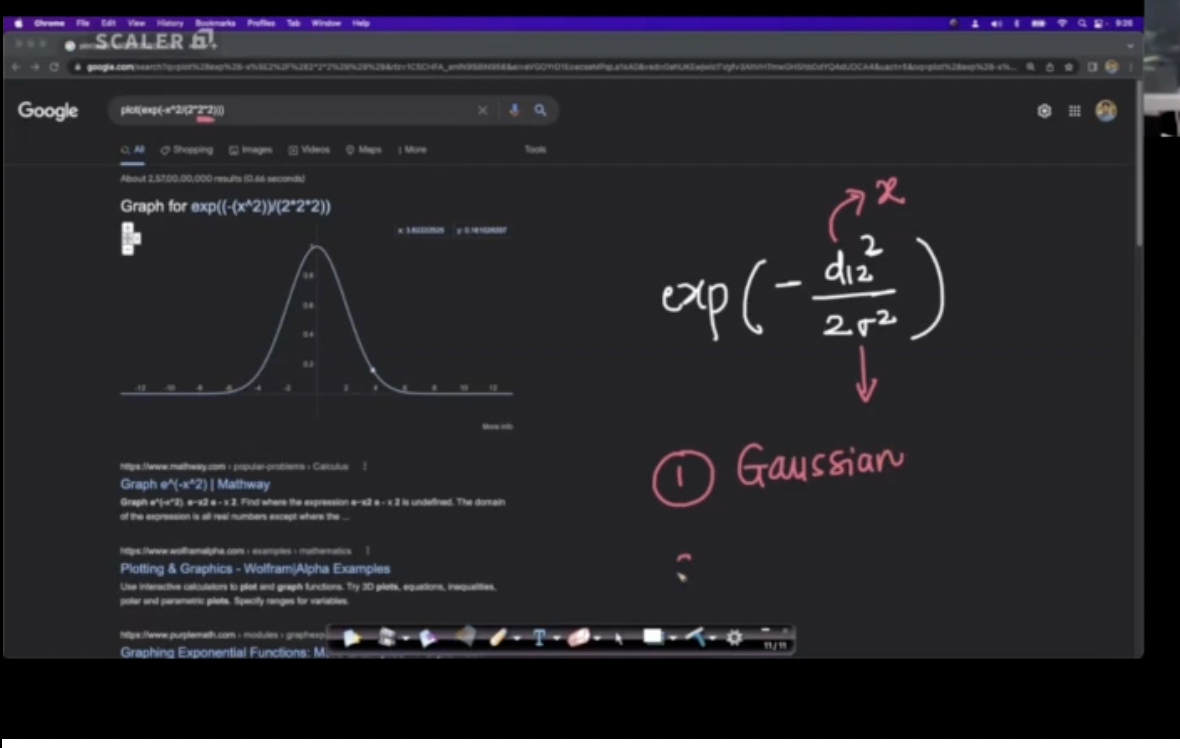

#### What happens if we reduce the σ hyperparameter ?

lets consider σ = 1

we see that:
- the Gaussian distribution gets thinner 

Hence,we can say
- σ acts as the standard deviation of the Gaussian distribution 


<img src='https://drive.google.com/uc?id=1jENY5ukffAksrQTrBwUiWJ8Un_E_KEAo'/>

#### **How does RBF kernel behaves ?**

Supposedly for some $ \sigma$, we plot the RBF kernel distribution,

<br>

#### Now if two points $ x_1 $ and $ x_2 $ are very close to each other, what happens to the RBF kernel value ?

Ans: kernel value K($x_1$ ,$x_2$) will be very high since

- $d_{12}$ will lie around the point 0, 
- and we can see how the peak of the Gaussian distribution is at point 0.

<br>

#### What does this high K($x_1$ ,$x_2$) value signify?

If we recall, kernel value 
- is measure of similarity, 
- and if points are close to each other they are very similar

Hence RBF Kernel value to be high, 
- means that the points are similar to each other

<br>

#### What will happen as $ d_{12} $ increases ?

Recall $ d_{12} $ is  only the euclidian distance between two points
- So if the euclidian distance increase, the points get far away from each other

Thus **exponentially** decreasing the Kernel value  K($ \ x_1$ , $ \ x_2$ ) 




<img src='https://drive.google.com/uc?id=1jwnozxZ9UxCJwh1aTRV3Vv2pai2v-5om'/> 


We can summarize by saying:

if Euclidean distance between points $x_1$ and $x_2$ decreases, 

- the Kernel value $k(x_1,x_2)$ will increase

<br>

and if Euclidean distance between points $x_1$ and $x_2$ increases, 

- the Kernel value $k(x_1,x_2)$ will decrease exponentially 


<img src='https://drive.google.com/uc?id=1Y7Mw429uUR2fjtrqj2ad9jfrIlueuK3b'/>

#### **Question: How does SVM works with RBF Kernel ?**

In dual form of SVM, 
- we replace $ x_i^Tx_j $ with RBF Kernel $ K_{RBF}(x_i,x_j)$
 

Now Supposedly we have some datapoints such that:

- No linear classifier can seperate these points

<br>

#### And we want to classify these points using RBF kernel SVM How can we do so ?

Recall when applying kernel functions, 
- we transform the d dimensional data to d' dimensional data 

<br>

now if we plot the RBF distribution with a small σ, 
- and Consider two points $x_1$ and $x_2$
 - Since both the points are close to each other, 
 - the distance $d_{12}$ will be close to 0, 
 
thus the Kernel value will be high for them 

 - Hence these datapoints in d' dimension ($x_1'$ and $x_2'$ ) will be very close to each other 

<br>


#### Now if we had a point x_3 which is a bit far off from $ x_1$, what will happen to these points in $ d' $ dimension ?

Since $ x_1 and x_3 $ have a high euclidean distance   ($d_{13}$)

- Hence the kernel value will be exponentially small,  
 - Thus making $x_1'^T x_3' $ to be small

<br>

Hence making the points ($x_1'$ and $x_3'$) far away from each other in d' dimension

<br>

#### Question : How will positive datapoints ($x_4$ and $x_5$), which are far away from $x_1$, behave in d' dimension ?

Since these datapoints $ x_4$ , $x_5$ are close to each other

- but their euclidean distance from $x_1$ is quite high,

hence in $ d' $ dimension, 
- $ x_4'$ , $x_5'$ will be close to each other 
- while being quite far away from  $x_1'$ 

<img src='https://drive.google.com/uc?id=1URxxx05DOd5QdwZCUIyx0FvjzAEQZP40'/>


Now imagine we have a some +ve and -ve datapoints in d dimension

- For small value of $ \sigma $, in d' dimension, 
  - RBF kernel will be grouping datapoints which are close to each other

<br>

Now if we recall, 
- that a small value of K in KNN model 
- will also be making the same grouping of data 

#### What can we say about RBF-SVM then ?
Ans: RBF kernel SVM with small $ \sigma $ is very similar to KNN with small K in d' dimension

<br>

Now recall how outliers impacted KNN with small k, 

#### Will outliers effect SVM models too ?

Ans: Yes, hence we can say 

- as KNN with small value of k, tends to overfit

- similarly, RBF kernel SVM  will also overfit the data

**Note:** SVM model is a proximity based model for KNN since,

- SVM implicitly transforms d dimensional data to d' dimensional data and act as a KNN model

<img src='https://drive.google.com/uc?id=18PE_vM9NVitYCbcQi1JccWGEh4PuNeFL'/> 

Lets take another example, 

- Notice how the closer +ve points will be together in d' dimension if σ is small

- this grouping will be similar to KNN with k=1, 

Hence $\sigma$ of RBF-SVM behaves similar to K of the KNN 


<img width=80% src='https://drive.google.com/uc?id=1J0WwxDCEFhE_zgfBlp71NM7izgTpMr2g'/> 

Lets understand how KNN and RBF-SVM are equivalent with one more example data,
- where grouping of datapoints is complex 

<br>

Though intuitively the K value in KNN and the σ in RBF-SVM behave the same,

- Mathematically ,
 - RBF-SVM is still finding a linear hyperplane in $ d' $ dimension 
 - that best separates the data

<br>

this finding of a best linear hyperplane in $ d'$ dimension is only possible,
-  when RBF-SVM considers $d'$ tending to $∞$ many dimensions

Hence we can say:
- KNN with small value of K is equivalent to 
- RBF-SVM with small value of $σ$ with ∞ many dimensions

<br>

**Note:** proof of how  $ d' -> ∞ $ works, is beyond the scope of this lecture

- also Projecting data to $ ∞ $ many dimension is only theoritical



<img width=80% src='https://drive.google.com/uc?id=1Ihiyl3cH1nRX8Iq9Grz6RkwITryIhdhm'/> 



There is another intuitive way of understanding above concept.

<br>

Let's say we have two features f1 and f2:

#### if we use only these two features, What will be the seperating hyperplane ?

Ans: Hyperplane will be a linear straight line 

<br>

#### What if we introduce 5 features $f_1,f_2,f_1^2,f_2^2, f_1f_2$, then how will be the hyperplane be ?

Ans: seperator will be somewhat a parabolic curve 
- or any quadratic curve similar to it in the 2-Dimensional space

- But in the 5-dimensional space,  
 - the separating hyperplane  will just be a linear line 

<br>


**Note:** RBF-SVM is still finding the separating hyperplane 
- in 2- dimensional space (f1 and f2)  




<img src='https://drive.google.com/uc?id=18a9kUtX52X-PNoKDhfWDL0_8-Z-2iBku'/> 

We saw, by introducing some 5 dimensional features, 
- the separating hyperplane became a quadratic curve 
- in the original 2-dimensional space,  

<br>

#### Now what if we create ∞ many features, then how will the separating hyperplane look in the original 2-Dimensional space ?

Ans: We will get a very complex hyperplane 

- Now this hyperplane is similar to KNN with small k

<br>


which implies that 
- KNN with small K is similar to 
- RBF-SVM with small σ having ∞ many dimensions

 <img  src='https://drive.google.com/uc?id=1UWP0Wmqk-mA3UJ9elyGpqdxtUlA_44cE'/>
 

#### **Question**: In KNN we disscused as dimension increases due to curse of dimensionality, euclidan distance fails but why use this distance metrics in SVM?


Ans: In RBF-SVM, we are still computing euclidean distance (|| X₁ - X₂ ||) in d dimension, 

- We only apply an RBF kernel function on to the euclidean distances,

- which transforms the distance to the higher d' dimension

<br>

```
Example: if we have data in d dimension such that d = 10.
```
We perform euclidean for all datapoints in this 10 dimension only 

- then transform these distance to ∞ many dimensions using RBF kernel 






<img src='https://drive.google.com/uc?id=1Mr9wv7LSCfXDNEPw10LytJOMmJSm5P5P'/> 

#### **Question:** Now if we have 2 +ve datapoints and one -ve datapoints, then how will RBF-SVM classify query points correctly?

Remember an RBF-SVM with small σ can be considered as KNN with K=1

- if we have some query points ( in pink) that 

- are closest to the +ve datapoint,
  - they will be classified as +ve by KNN with K = 1 and same by RBF-SVM

<br>
 
Similarly, all the query points closest to -ve datapoint
- will be classified as -ve

<br>

Now if we had a query point which were to belong to +ve class label, 

- but is close to -ve datapoint

#### Then how will the RBF-SVM classify such a point?

Ans: RBF-SVM will misclassify that query point to be -ve class label

- Showing how RBF-SVM is prone to errors and hence not widely used




<img src='https://drive.google.com/uc?id=1vG9aCIdJLtG3LXooTzocceMUpKT0aZps'/> 



#### ***Question: If RBF-SVM is very much similar to KNN geometrically, then why use RBF-SVM ?***

Ans: They both differ in the runtime complexity.

#### What is the run time complexity for a test point in SVM ?

if we recall for query point $(x_q)$, 
- $ f(x_q) =  \sum_1^n \alpha_i \ y_i \ k(x_i,x_q) + b $ 

- and $α_i$ are non-zero only for Support vectors

<br>

hence, we can say 

- Complexity only depends on number of support vectors

<br>

Therefore the Run time complexity will be number of Support vectors 
- multiplied by the d dimension.
 - <b> O( #SV * d ) </b> 
 



<img src='https://drive.google.com/uc?id=16QajZ3a-XNPtcRKcJUwIXnD5n9UWj95r'/>


#### what is test time complexity for KNN ?

if we recall, for KNN, 
- the time complexity will be number of data points (n) 
- multiplied by the d dimension 
 - O( n * d ) 

<br>

> And number of Support Vectors <<< number of datapoints

<br>

Hence making SVM computationally faster than KNN 


<img src='https://drive.google.com/uc?id=1JJg8IP7MOJMv9Kt8pbNuGPlhK-xNNnUq'/> 


### Code Implemetation for RBF-SVM on Spam Data 


#### Do you think RBF SVM will work well ?

If we recall, we calculate euclidian distance in RBF SVM
- But since dimension of our data is very high
- RBF SVM is not expected to work well in this case

Let's see if our hypothesis is correct or not

In [ ]:
# RBF-SVC

from sklearn.model_selection import GridSearchCV

params = {
        'C': [0.1, 1,10],
        'gamma':[1e-3, 0.01, 0.1, 1]
        }
svc = SVC(class_weight={ 0:0.1, 1:0.5 }, kernel='rbf')
clf = GridSearchCV(svc, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

# Euclidean distance in high dimensions in RBF calculation.

Parameters:{'C': 0.1, 'gamma': 0.001} Mean_score: 0.0 Rank: 9
Parameters:{'C': 0.1, 'gamma': 0.01} Mean_score: 0.0 Rank: 9
Parameters:{'C': 0.1, 'gamma': 0.1} Mean_score: 0.0 Rank: 9
Parameters:{'C': 0.1, 'gamma': 1} Mean_score: 0.0 Rank: 9
Parameters:{'C': 1, 'gamma': 0.001} Mean_score: 0.33984739972559314 Rank: 1
Parameters:{'C': 1, 'gamma': 0.01} Mean_score: 0.03503299649161686 Rank: 6
Parameters:{'C': 1, 'gamma': 0.1} Mean_score: 0.03503299649161686 Rank: 6
Parameters:{'C': 1, 'gamma': 1} Mean_score: 0.03503299649161686 Rank: 6
Parameters:{'C': 10, 'gamma': 0.001} Mean_score: 0.2662360034453058 Rank: 2
Parameters:{'C': 10, 'gamma': 0.01} Mean_score: 0.24175451029025305 Rank: 3
Parameters:{'C': 10, 'gamma': 0.1} Mean_score: 0.23898244554912815 Rank: 4
Parameters:{'C': 10, 'gamma': 1} Mean_score: 0.23898244554912815 Rank: 4


As you can see, the RBF-SVM did not perform well on the data since we have some 7000 features, 

- we get the best performance when $C=1$, and $gamma =0.1 $  with F1- score of 0.33, 

Now implementing this SVM on test Data

In [ ]:
svc = SVC(C=1,gamma=0.001,class_weight={ 0:0.1, 1:0.5 }, kernel='rbf')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.f1_score(y_test,y_pred))


0.36725663716814155


As we can see the RBF-SVM did not perform well 

Recall we did Multinomial Naive Bayes on the same data 

Now let's compare the SVM results with Multinomial Naive Bayes

Note: There is no scaling required in Multinomial Naive Bayes

In [ ]:
df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

#Count Vectorizer
f = feature_extraction.text.CountVectorizer()

X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

# No need of scaling


# Multinomial NB

from sklearn.model_selection import GridSearchCV

params = {
        'alpha':[0.01, 0.1, 1, 10]
        }
mnb = naive_bayes.MultinomialNB()
clf = GridSearchCV(mnb, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


[(4173,), (1392,)]
Parameters:{'alpha': 0.01} Mean_score: 0.9044795585687031 Rank: 2
Parameters:{'alpha': 0.1} Mean_score: 0.8913346584852938 Rank: 3
Parameters:{'alpha': 1} Mean_score: 0.9131806549080933 Rank: 1
Parameters:{'alpha': 10} Mean_score: 0.8624518433473658 Rank: 4


As you can see, we get the best performance when $α=1$, with F1- score of 0.91, 

Using the best Naive Bayes model on test data



In [ ]:

mnb = naive_bayes.MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

print(metrics.f1_score(y_test,y_pred))


0.9398907103825136


Conclusion
 - Multinomial NB > Linear SVM >> RBF SVM 
 - so we can conclude that training a complex model doesn't always mean better results
 - We should choose the right model based on the data knowledge

# **Summary**


- SVM is margin maximization linear seperator model
- Hard margin SMV when data is completely linearly seperable
- Soft margin SVM when data almost linearly seperable, minimizing hinge loss
- Soft margin SVM almost similar to Logistic regression
- then we learned about Non-linear/ Kernel SVMs, primal dual forms
- different types of kernel: Quadratic, RBF
- RBF SVM behaves very similar to KNN, how $ \sigma $ in RBF  is similar to K in KNN

<img src='https://drive.google.com/uc?id=10pQQHbQvnG6auKeuE6AkX7FKhx_3--9t'/>
<img src='https://drive.google.com/uc?id=1J5fDOOG1WDHDp3ivaTLwMRg477NVoAJ8'/> 


Recall we used RBF kernels only when 
- we do not use any domain specific kernels


#### What do we mean by domain specific kernels?

There has been researchs done to 
- have domain specific kernels for strings, protien/molecules, Graphs

But in practice today , 
- we don't use these kernels, 
- since all these domain specific tasks 
 - can be easily solved with Deep learning 


<br>

**Note:** There is library called **libSVM**, C++ implementation of SVM, sklearn also use this library 
internally

- Also for SVM, we have an alternative Gradient Descent Algorithm (SMO) 
 - which is beyond the scope of this lecture

<br>


#### Why is SVM not used much ?

Ans: one of the biggest problem with SVM is train time complexity is very high 
 - of the order of square of the number of datapoints 
  - $O(n^2)$



Also the run time complexity of SVM depends on number of support vectors 
- Which can be very high or very low

Hence we have no control over the number of Support Vectors

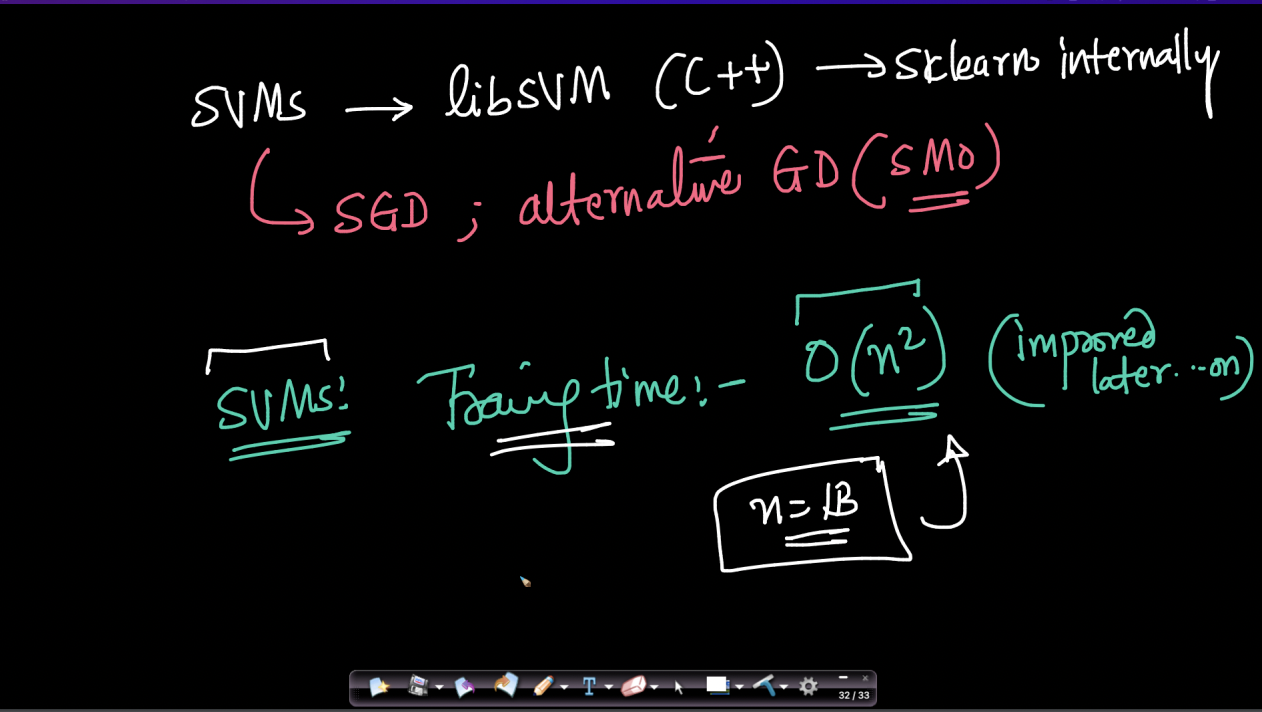